# Support Vector Machine (SVM)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
!wget https://raw.githubusercontent.com/BaoLocPham/MachineLearningFromScratch/main/Data/Classification/Social_Network_Ads.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MachineLearning/Part3_Classification/Section16_Support_Vector_Machine_(SVM)/Python


## Importing the dataset

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
X_train[:10]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153]])

## Training the SVM model on the Training set

In [13]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting a new result

In [15]:
classifier.predict(sc_X.transform([[30, 87000]]))

array([0])

## Predicting the Test set results

In [16]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

confusion_matrix, accuracy

(array([[66,  2],
        [ 8, 24]]), 0.9)

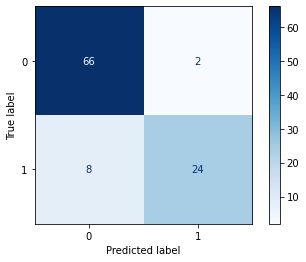

In [21]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test, cmap="Blues")

## Visualising the Training set results

No handles with labels found to put in legend.


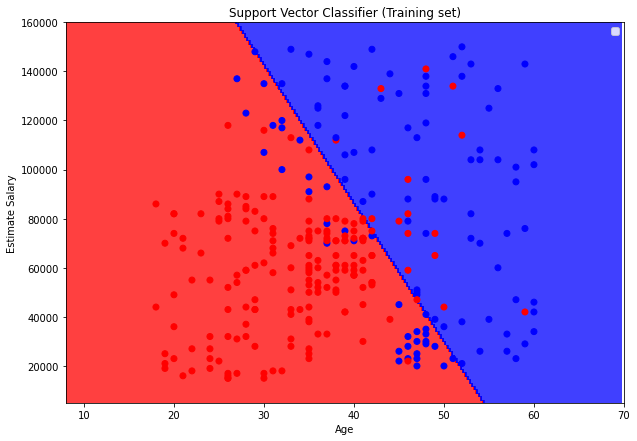

In [28]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc_X.inverse_transform(X_train), y_train

X1_min, X1_max = X_set[:,0].min()-10, X_set[:,0].max()+10
X2_min, X2_max = X_set[:,1].min()-10000, X_set[:,1].max()+10000

X1, X2 = np.meshgrid(np.arange(X1_min, X1_max, step=0.25),
                     np.arange(X2_min, X2_max, step=0.25))

X_in = sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)
# predicting
y_pred = classifier.predict(X_in).reshape(X1.shape)

# plotting
plt.figure(figsize=(10,7))
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)

plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(("red","blue")))
plt.scatter(X_set[:,0], X_set[:,1], c=y_train, cmap=ListedColormap(("red", "blue")))

plt.title("Support Vector Classifier (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimate Salary")
plt.legend()
plt.show()

## Visualising the Test set results

No handles with labels found to put in legend.


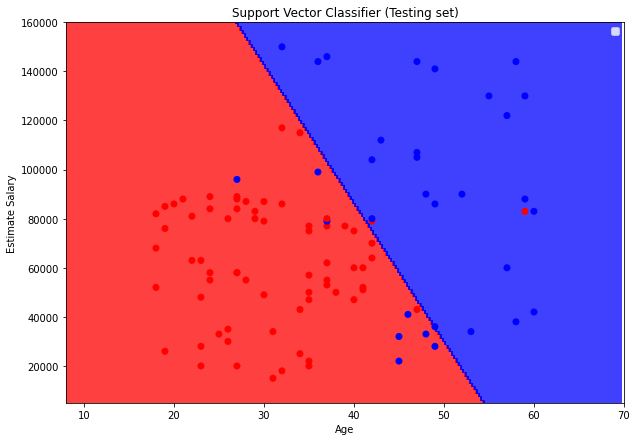

In [29]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc_X.inverse_transform(X_test), y_test

X1_min, X1_max = X_set[:,0].min()-10, X_set[:,0].max()+10
X2_min, X2_max = X_set[:,1].min()-10000, X_set[:,1].max()+10000

X1, X2 = np.meshgrid(np.arange(X1_min, X1_max, step=0.25),
                     np.arange(X2_min, X2_max, step=0.25))

X_in = sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)
# predicting
y_pred = classifier.predict(X_in).reshape(X1.shape)

# plotting
plt.figure(figsize=(10,7))
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)

plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(("red","blue")))
plt.scatter(X_set[:,0], X_set[:,1], c=y_test, cmap=ListedColormap(("red", "blue")))

plt.title("Support Vector Classifier (Testing set)")
plt.xlabel("Age")
plt.ylabel("Estimate Salary")
plt.legend()
plt.show()